# Ensemble learning and random forest

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [29]:
log_clf = LogisticRegression(solver='liblinear',random_state=42)
random_forest_clf = RandomForestClassifier(n_estimators=10,random_state=42)
svm_clf = SVC(gamma='auto',random_state=42)

In [30]:
voting_clf = VotingClassifier(estimators=[('log_clf',log_clf),
                                          ('svc_clf',svm_clf),
                                          ('random_forest_clf',random_forest_clf)],
                              voting='hard')

In [31]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('log_clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('svc_c...mators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [33]:
clf_names = ['Logistic regression classifier','Random forest classifier','SVM classifier','Voting classifier']
classifiers = [log_clf,random_forest_clf,svm_clf,voting_clf]

for clf_name,clf in zip(clf_names,classifiers):
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)
    print(clf_name,' : ',accuracy_score(y_test,y_pred))

Logistic regression classifier  :  0.864
Random forest classifier  :  0.872
SVM classifier  :  0.888
Voting classifier  :  0.896


## Bagging and pasting

One way to get a diverse set of classifiers is to use very different training algorithms. Another approach is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set. When sampling is performed with replacement, this method is called **bagging**(short for bootstrap aggregating). When sampling is performed without replacement, it is called **pasting**.

In [34]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,random_state=42)
bag_clf.fit(X_train,y_train)

y_pred = bag_clf.predict(X_test)

In [35]:
print(accuracy_score(y_test,y_pred))

0.904


In [36]:
dec_tree_clf = DecisionTreeClassifier(random_state=42)
dec_tree_clf.fit(X_train,y_train)
y_pred_dec_tree = dec_tree_clf.predict(X_test)
print(accuracy_score(y_test,y_pred_dec_tree))

0.856


In [37]:
X.shape

(500, 2)

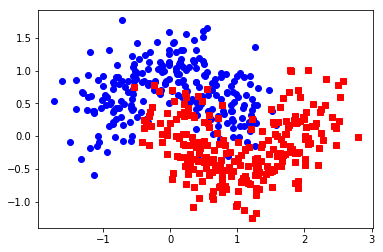

In [38]:
plt.plot(X[:,0][y==0],X[:,1][y==0],'bo')
plt.plot(X[:,0][y==1],X[:,1][y==1],'rs')
plt.show()

In [39]:
def plot_decision_boundary(clf,X,y,axes):
    x1s= np.linspace(axes[0],axes[1],100)
    x2s=np.linspace(axes[2],axes[3],100)
    x1,x2 = np.meshgrid(x1s,x2s)
    
    X_new = np.hstack((x1.reshape(-1,1),x2.reshape(-1,1)))
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.plot(X[:,0][y==0],X[:,1][y==0],'bo',alpha=0.5)
    plt.plot(X[:,0][y==1],X[:,1][y==1],'gs',alpha=0.5)
    plt.contourf(x1,x2,y_pred,alpha=0.3)
    plt.show()

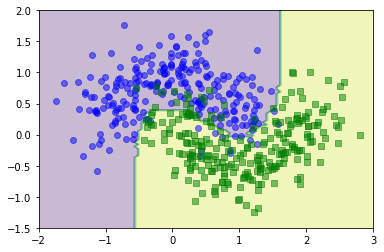

In [40]:
plot_decision_boundary(bag_clf,X,y,[-2,3,-1.5,2])

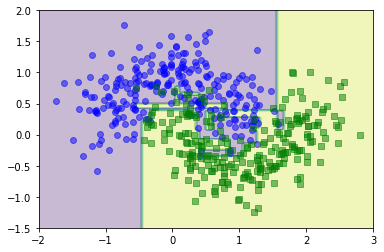

In [41]:
plot_decision_boundary(dec_tree_clf,X,y,[-2,3,-1.5,2])

## Out of bag evaluation

In [42]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,bootstrap=True,n_jobs=-1,oob_score=True,random_state=42)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.8986666666666666

In [43]:
bag_clf.oob_decision_function_

array([[0.32352941, 0.67647059],
       [0.35625   , 0.64375   ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.06145251, 0.93854749],
       [0.35465116, 0.64534884],
       [0.01142857, 0.98857143],
       [0.98930481, 0.01069519],
       [0.97409326, 0.02590674],
       [0.7370892 , 0.2629108 ],
       [0.0049505 , 0.9950495 ],
       [0.75      , 0.25      ],
       [0.82681564, 0.17318436],
       [0.98461538, 0.01538462],
       [0.06315789, 0.93684211],
       [0.00490196, 0.99509804],
       [0.99004975, 0.00995025],
       [0.92513369, 0.07486631],
       [1.        , 0.        ],
       [0.03409091, 0.96590909],
       [0.34502924, 0.65497076],
       [0.91666667, 0.08333333],
       [1.        , 0.        ],
       [0.96319018, 0.03680982],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.65420561, 0.34579439],
       [0.

In [44]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.912

## Random forest

In [45]:
rand_forest_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1,max_leaf_nodes=16,random_state=42)
rand_forest_clf.fit(X_train,y_train)

y_pred_rf = rand_forest_clf.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred_rf)

0.912

## Feature importance

Yet another great quality of Random Forests is that they make it easy to measure the
relative importance of each feature. Scikit-Learn measures a feature’s importance by
looking at how much the tree nodes that use that feature reduce impurity on average
(across all trees in the forest). More precisely, it is a weighted average, where each
node’s weight is equal to the number of training samples that are associated with it.

In [48]:
# mnist = fetch_openml('mnist_784', version=1)

## Boosting

### Adaboost

One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. This is the technique used by AdaBoost. For example, to build an AdaBoost classifier, a first base classifier (such as a Decision Tree) is trained and used to make predictions on the training set. The relative weight of misclassified training instances is then increased. A second classifier is trained using the updated weights and again it makes predictions on the training set, weights are updated, and so on.

Check python implementation of AdaBoost [here](https://github.com/jaimeps/adaboost-implementation).

In [50]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200,algorithm='SAMME.R',learning_rate=0.5,random_state=42)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

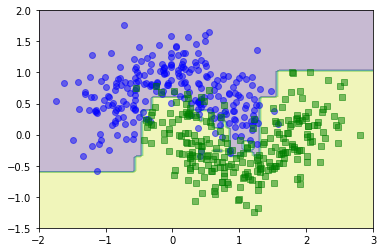

In [52]:
plot_decision_boundary(ada_clf,X,y,[-2,3,-1.5,2])

## Gradient boosting

In [54]:
np.random.seed(42)

In [55]:
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2 + 0.05 * np.random.randn(100)

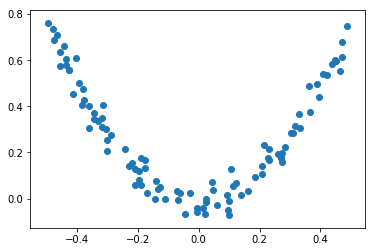

In [56]:
plt.scatter(X,y)
plt.show()

In [58]:
tree_reg1 = DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [59]:
y2 = y-tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [60]:
y3 = y2-tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [61]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1,tree_reg2,tree_reg3)) 

In [62]:
y_pred

array([0.75026781])

In [78]:
def plot_predictions(X,y,axes,regressors):
    x1 = np.linspace(axes[0],axes[1],500)
    y_pred = sum(regressor.predict(x1.reshape(-1,1)) for regressor in regressors)
    
    plt.plot(X[:,0],y,'b.')
    plt.plot(x1,y_pred,'r-',linewidth=2)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

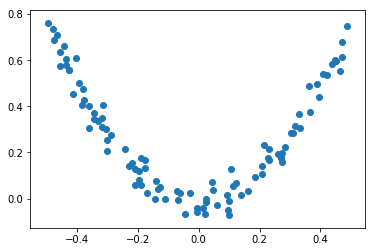

In [74]:
plt.scatter(X,y)
plt.show()

#### Using only regressor 1

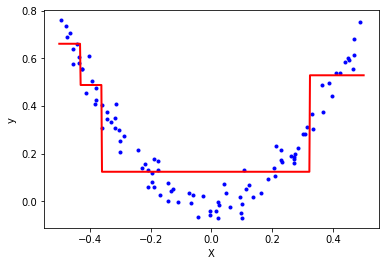

In [79]:
plot_predictions(X,y,[-0.5,0.5],[tree_reg1])

#### Using regressor 1 and 2

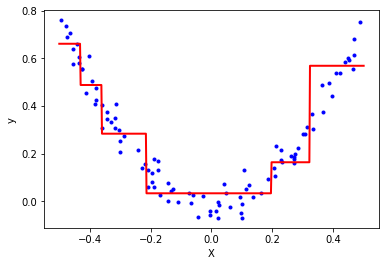

In [80]:
plot_predictions(X,y,[-0.5,0.5],[tree_reg1,tree_reg2])

#### Using regressors 1,2 and 3

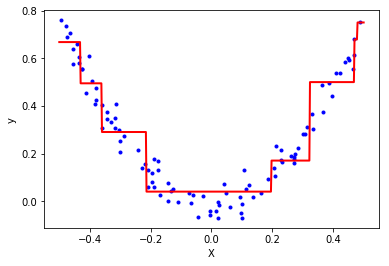

In [81]:
plot_predictions(X,y,[-0.5,0.5],[tree_reg1,tree_reg2,tree_reg3])

#### Using `GradientBoostingRegressor`

In [83]:
gb_reg = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0,random_state=42)
gb_reg.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

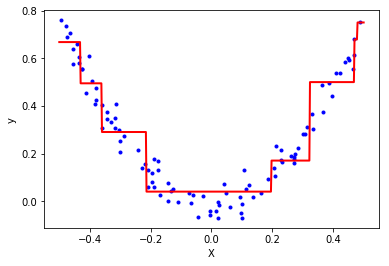

In [84]:
plot_predictions(X,y,[-0.5,0.5],[gb_reg])

#### Using small learning rate

In [87]:
gb_reg = GradientBoostingRegressor(max_depth=2,n_estimators=200,learning_rate=0.1,random_state=42)
gb_reg.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

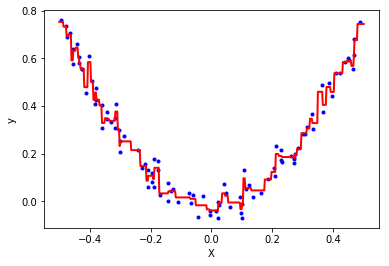

In [88]:
plot_predictions(X,y,[-0.5,0.5],[gb_reg])

### Gradient boosting with early stopping

In [94]:
X_train,X_dev,y_dev,y_dev = train_test_split(X,y,random_state=49)
gb_reg = GradientBoostingRegressor(max_depth=2,n_estimators=120,random_state=42)
gb_reg.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [95]:
errors = [mean_squared_error(y_dev,y_pred) for y_pred in gb_reg.staged_predict(X_dev)]

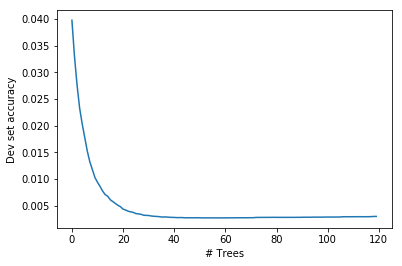

In [99]:
plt.plot(errors)
plt.xlabel('# Trees')
plt.ylabel('Dev set accuracy')
plt.show()

#### Early stopping implementation

In [101]:
gb_reg =  GradientBoostingRegressor(max_depth=2,warm_start=True,random_state=42)

min_val_error = float('inf')
error_going_up = 0

for n_estimators in range(1,120):
    gb_reg.n_estimators = n_estimators
    gb_reg.fit(X_train,y_train)
    y_pred = gb_reg.predict(X_dev)
    val_error = mean_squared_error(y_dev,y_pred)
    
    if(val_error < min_val_error):
        min_val_error = val_error
        error_going_up =0
    else:
        error_going_up+=1
        if(error_going_up==5):
            break

In [102]:
gb_reg.n_estimators

61